# Exploratory Analysis – Planted Area by Crop Type

In [2]:
df = pd.read_csv("Smart_Farming_Crop_Yield_2024.csv")

df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    str    
 1   region                500 non-null    str    
 2   crop_type             500 non-null    str    
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    str    
 10  fertilizer_type       500 non-null    str    
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    str    
 13  harvest_date          500 non-null    str    
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  500 non-null

In [4]:
df.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [5]:
df["sowing_date"] = pd.to_datetime(df["sowing_date"])
df["harvest_date"] = pd.to_datetime(df["harvest_date"])
df["timestamp"] = pd.to_datetime(df["timestamp"])

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   farm_id               500 non-null    str           
 1   region                500 non-null    str           
 2   crop_type             500 non-null    str           
 3   soil_moisture_%       500 non-null    float64       
 4   soil_pH               500 non-null    float64       
 5   temperature_C         500 non-null    float64       
 6   rainfall_mm           500 non-null    float64       
 7   humidity_%            500 non-null    float64       
 8   sunlight_hours        500 non-null    float64       
 9   irrigation_type       350 non-null    str           
 10  fertilizer_type       500 non-null    str           
 11  pesticide_usage_ml    500 non-null    float64       
 12  sowing_date           500 non-null    datetime64[us]
 13  harvest_date          500 non-n

In [6]:
df.isnull().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

In [7]:
df["irrigation_type"].value_counts()

irrigation_type
Sprinkler    121
Manual       118
Drip         111
Name: count, dtype: int64

In [8]:
df["crop_disease_status"].value_counts()

crop_disease_status
Severe      133
Mild        125
Moderate    112
Name: count, dtype: int64

In [9]:
df["crop_disease_status"].isnull().sum() / len(df)

np.float64(0.26)

In [10]:
df["crop_disease_status"] = df["crop_disease_status"].fillna("Healthy")

df["crop_disease_status"].value_counts()

crop_disease_status
Severe      133
Healthy     130
Mild        125
Moderate    112
Name: count, dtype: int64

In [11]:
df["irrigation_type"].isnull().sum() / len(df)

np.float64(0.3)

In [12]:
df["irrigation_type"] = df["irrigation_type"].fillna("Unknown")

df["irrigation_type"].value_counts()

irrigation_type
Unknown      150
Sprinkler    121
Manual       118
Drip         111
Name: count, dtype: int64

In [13]:
df["yield_kg_per_hectare"].describe()

count     500.00000
mean     4032.92694
std      1174.43304
min      2023.56000
25%      2994.82000
50%      4071.69000
75%      5062.11000
max      5998.29000
Name: yield_kg_per_hectare, dtype: float64

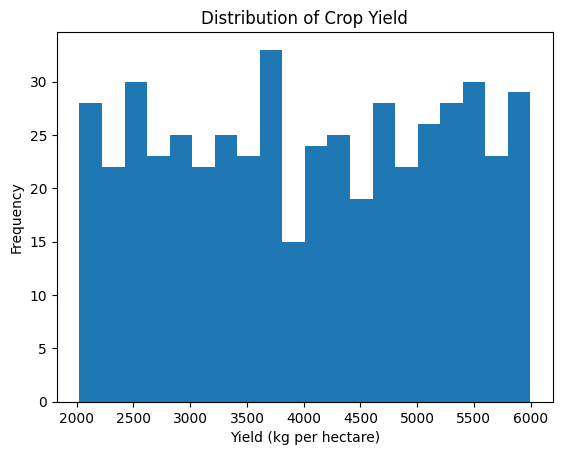

In [14]:
import matplotlib.pyplot as plt

plt.hist(df["yield_kg_per_hectare"], bins=20)
plt.xlabel("Yield (kg per hectare)")
plt.ylabel("Frequency")
plt.title("Distribution of Crop Yield")
plt.show()

In [15]:
df.groupby("crop_type")["yield_kg_per_hectare"].mean().sort_values(ascending=False)

crop_type
Soybean    4256.814074
Wheat      4077.584565
Maize      3982.553874
Cotton     3925.603084
Rice       3896.180000
Name: yield_kg_per_hectare, dtype: float64

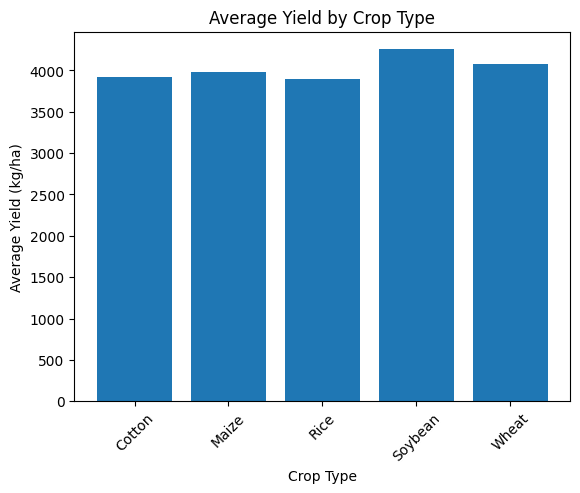

In [16]:
import matplotlib.pyplot as plt

mean_yield = df.groupby("crop_type")["yield_kg_per_hectare"].mean()

plt.bar(mean_yield.index, mean_yield.values)
plt.xticks(rotation=45)
plt.xlabel("Crop Type")
plt.ylabel("Average Yield (kg/ha)")
plt.title("Average Yield by Crop Type")
plt.show()

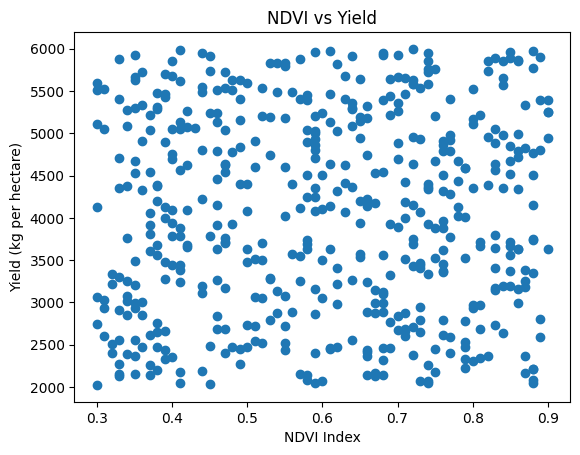

In [17]:
plt.scatter(df["NDVI_index"], df["yield_kg_per_hectare"])
plt.xlabel("NDVI Index")
plt.ylabel("Yield (kg per hectare)")
plt.title("NDVI vs Yield")
plt.show()

In [18]:
df["NDVI_index"].corr(df["yield_kg_per_hectare"])

np.float64(0.03809905838033069)

In [19]:
df.corr(numeric_only=True)["yield_kg_per_hectare"].sort_values(ascending=False)


yield_kg_per_hectare    1.000000
pesticide_usage_ml      0.041290
humidity_%              0.039021
NDVI_index              0.038099
temperature_C           0.027875
soil_pH                 0.024274
longitude               0.022359
sunlight_hours          0.020284
total_days             -0.007570
latitude               -0.038127
soil_moisture_%        -0.063038
rainfall_mm            -0.076802
Name: yield_kg_per_hectare, dtype: float64

In [20]:
df.groupby("crop_disease_status")["yield_kg_per_hectare"].mean().sort_values(ascending=False)

crop_disease_status
Mild        4089.871760
Healthy     4082.647615
Severe      4029.344286
Moderate    3915.915357
Name: yield_kg_per_hectare, dtype: float64

<Figure size 640x480 with 0 Axes>

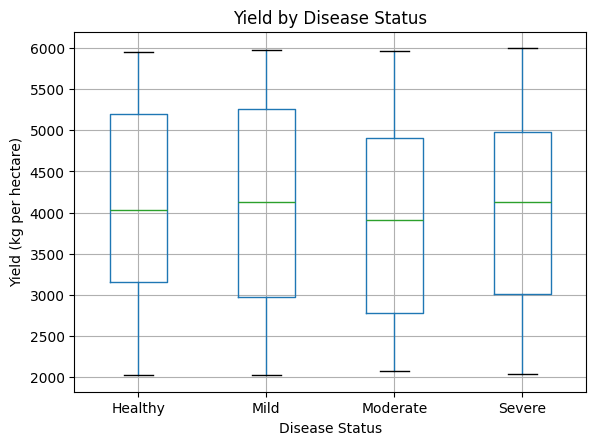

In [21]:
plt.figure()
df.boxplot(column="yield_kg_per_hectare", by="crop_disease_status")
plt.xlabel("Disease Status")
plt.ylabel("Yield (kg per hectare)")
plt.title("Yield by Disease Status")
plt.suptitle("")
plt.show()

In [22]:
df.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,sowing_date,harvest_date,total_days,yield_kg_per_hectare,timestamp,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500,500,500.000000,500.00000,500,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,2024-02-15 05:42:43.200000,2024-06-13 17:36:57.600000,119.496000,4032.92694,2024-04-14 17:42:43.200000,22.442473,80.392248,0.602060
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,2024-01-01 00:00:00,2024-04-09 00:00:00,90.000000,2023.56000,2024-01-03 00:00:00,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,2024-01-23 00:00:00,2024-05-24 00:00:00,105.750000,2994.82000,2024-03-12 00:00:00,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,2024-02-16 00:00:00,2024-06-14 00:00:00,119.000000,4071.69000,2024-04-14 00:00:00,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,2024-03-09 00:00:00,2024-07-06 06:00:00,134.000000,5062.11000,2024-05-18 06:00:00,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,2024-03-28 00:00:00,2024-08-17 00:00:00,150.000000,5998.29000,2024-08-12 00:00:00,34.981531,89.991901,0.900000
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,NaN,NaN,16.798046,1174.43304,NaN,7.283492,5.910664,0.175402
